In [1]:
# importing packages
import numpy as np
import PIL
from PIL import Image
import matplotlib.pyplot as plt
import glob


In [2]:
# function for finding mean
def find_mean(lst):
    sum_together = 0
    for i in lst:
        sum_together += i
    return sum_together / len(lst)

# function to find standard deviation
def find_standard_deviation(lst):
    mean_data = find_mean(lst)
    variance = sum((x - mean_data) ** 2 for x in lst) / len(lst)
    return np.sqrt(variance)

### Section 4.1

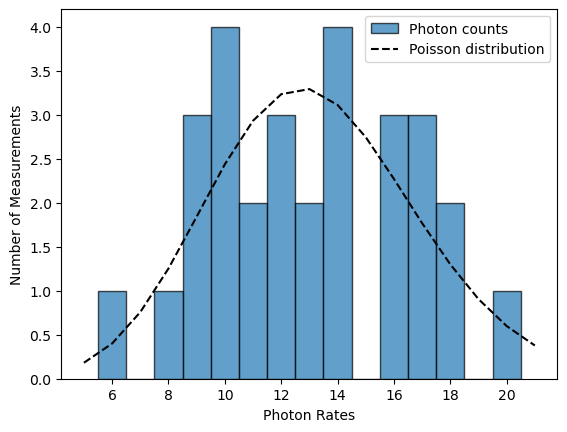

In [3]:
from scipy.stats import poisson

# Generating the data given in the lab manual
data = [13, 17, 18, 14, 11, 8, 21, 18, 9, 12,
       9, 17, 14, 6, 10, 16, 16, 11, 10, 12,
       9, 20, 14, 10, 14, 17, 13, 16, 12, 10]

# Finding the mean of the data using the find_mean function
lambda_poisson = find_mean(data)

# Create the histogram
plt.hist(data, bins=np.arange(5.5, 21.5, 1), edgecolor='black', alpha=0.7, label='Photon counts')

# Generate Poisson distribution values
x_values = np.arange(5, 22, 1)
poisson_dist = poisson.pmf(x_values, lambda_poisson) * len(data)

# Plotting
plt.plot(x_values, poisson_dist, 'k--', label=f'Poisson distribution')

plt.xlabel('Photon Rates')
plt.ylabel('Number of Measurements')
plt.legend()

# Display the plot
plt.show()

In [5]:
from scipy.stats import poisson, norm

# Load the data from files
large_data = np.loadtxt('Large.txt')
small_data = np.loadtxt('Small.txt')

# Calculating the standard deviation and mean of data
mean_large = find_mean(large_data)
std_large = find_standard_deviation(large_data)
mean_small = find_mean(small_data)
std_small = find_standard_deviation(small_data)

print("Mean of Large.txt: ", mean_large)
print("Standard Deviation of Large.txt: ", std_large)

print("Mean of Small.txt: ", mean_small)
print("Standard Deviation of Small.txt: ", std_small)

Mean of Large.txt:  1072.528
Standard Deviation of Large.txt:  32.8154722044343
Mean of Small.txt:  3.392
Standard Deviation of Small.txt:  1.8580462857528603


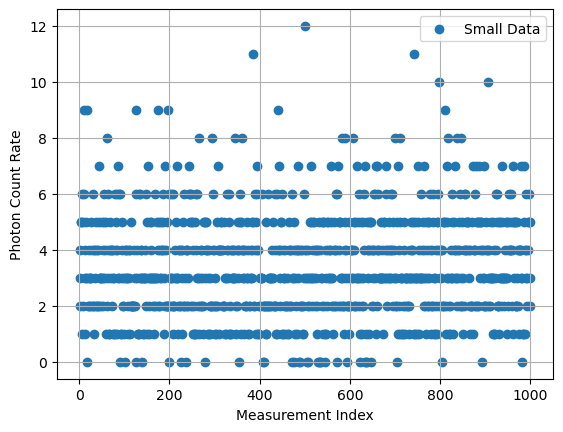

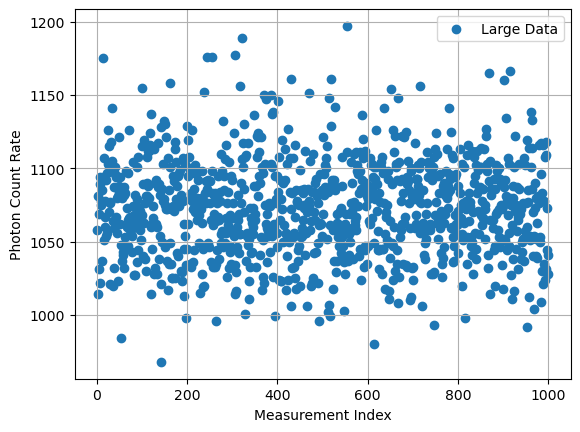

In [6]:
# Plot the measurements in sequence for the small data
plt.scatter(range(1, len(small_data) + 1), small_data, label='Small Data')
plt.xlabel('Measurement Index')
plt.ylabel('Photon Count Rate')
plt.legend()
plt.grid(True)
plt.show()

# Plot the measurements in sequence for the large data
plt.scatter(range(1, len(large_data) + 1), large_data, label='Large Data')
plt.xlabel('Measurement Index')
plt.ylabel('Photon Count Rate')
plt.legend()
plt.grid(True)
plt.show()


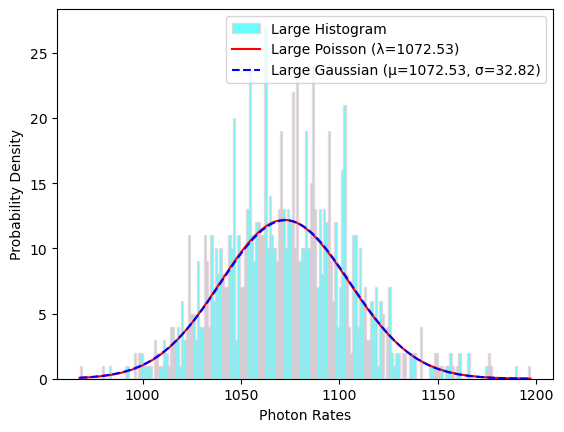

In [7]:


# Plotting out large data
plt.hist(large_data, bins=200, alpha=0.6, color='aqua', edgecolor='pink', label=f'Large Histogram')

# Generate Poisson distribution based on the mean
x_values = np.arange(min(large_data), max(large_data) + 1)
poisson_dist = poisson.pmf(x_values, mean_large) * len(large_data)

# Plot the Poisson distribution
plt.plot(x_values, poisson_dist, 'r-', label=f'Large Poisson (λ={mean_large:.2f})')


# Plot the Gaussian distribution
x_gaussian = np.linspace(min(large_data), max(large_data), 100)
gaussian_dist = norm.pdf(x_gaussian, mean_large, std_large) * len(large_data)
plt.plot(x_gaussian, gaussian_dist, 'b--', label=f'Large Gaussian (μ={mean_large:.2f}, σ={std_large:.2f})')

plt.xlabel('Photon Rates')
plt.ylabel('Probability Density')

plt.legend()

plt.show()


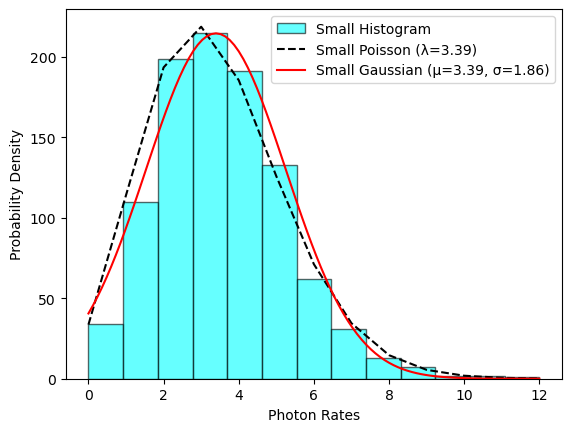

In [8]:
# Plotting out small data
plt.hist(small_data, bins=13, alpha=0.6, color='aqua', edgecolor='black', label=f'Small Histogram')

# Generate Poisson distribution based on the mean
x_values = np.arange(min(small_data), max(small_data) + 1)
poisson_dist = poisson.pmf(x_values, mean_small) * len(small_data)

# Plot the Poisson distribution
plt.plot(x_values, poisson_dist, 'k--', label=f'Small Poisson (λ={mean_small:.2f})')


# Plot the Gaussian distribution
x_gaussian = np.linspace(min(small_data), max(small_data), 100)
gaussian_dist = norm.pdf(x_gaussian, mean_small, std_small) * len(small_data)
plt.plot(x_gaussian, gaussian_dist, 'r-', label=f'Small Gaussian (μ={mean_small:.2f}, σ={std_small:.2f})')

plt.xlabel('Photon Rates')
plt.ylabel('Probability Density')

plt.legend()

plt.show()


### Section 4.2.4

In [9]:
#defining directories and filenames 

datadir = '/home/jovyan/AST325'

dark_folder = 'dark_images'

light_folder = 'light_images'

dark_filename = 'dark_image.txt'

light_filename = 'light_image.txt'

In [10]:
#reading filenames and finding the path

dark_image_names_glob = glob.glob('{}/{}/*'.format(datadir, dark_folder))

light_image_names_glob = glob.glob('{}/{}/*'.format(datadir, light_folder))

In [11]:
img = Image.open('/home/jovyan/AST325/dark_images/Capture010[1].tiff')
img_arr = np.array(img) # Transform into numpy
# array
img_arr.shape # Check dimensions
img_arr # Print array
print(img_arr.shape)
print(img_arr)
len(img_arr)

(964, 1288)
[[237 103   0 ...   4   3   3]
 [  3   3   3 ...   4   3   3]
 [  3   3   4 ...   3   3   3]
 ...
 [  3   3   3 ...   3   3   3]
 [  3   3   2 ...   4   3   3]
 [  3   3   3 ...   3   3   3]]


964

In [12]:
def find_mean(namelist) -> int:
    """This function would find the mean of a list of matrices and average them. It takes a [namelist] string
    and converts it into an array. After collecting all the arrays, it sums them up and divides by the number
    of strings to get the mean in each pixel.
    """
    # initiate an 964 by 1288 array as that is the pixel size of each image
    array = np.zeros((964, 1288))
    
    # a loop to add every number and divide to get the mean
    for i in namelist:
        img = Image.open(i)
        img_arr = np.array(img)
        array = array + img_arr
    result = array / len(namelist)
    return result


In [13]:
# Finding the mean of the dark images
dark_mean = find_mean(dark_image_names_glob)

In [14]:
def subs_mean(namelist, dark_mean):
    """This function would find the ADU of each pixel and minus the mean of the dark images we got.
    Afterwards, we would add up all 25 images's value and get the mean and the variance.
    """
    # Initialize a empty list to store each of the entries.
    lst = []
    # loop the 25 images
    for i in namelist:
        img = Image.open(i)
        img_arr = np.array(img)
        # subtract each pixel by the mean calculated before for each respective pixels
        array = img_arr - dark_mean
        # adding it to the list
        lst.append(array)
    # finding the mean and variance of the list of arrays
    subtract_mean = np.mean(lst,axis=0)
    var = np.var(lst, axis=0)
    return subtract_mean, var

In [15]:
# Getting the mean and the variance
mean, var=subs_mean(light_image_names_glob, dark_mean)

In [16]:
# Now we flatten the mean and the variance in order to plot it
mean=mean.flatten()
var=var.flatten()

# Generating 1000 random values
random_value = np.random.randint(1, 1288 * 964 + 1, size=1000)
random_mean = []
random_var = []

# Find 1000 random mean and variance
for i in random_value:
    random_mean.append(mean[i])
    random_var.append(var[i])

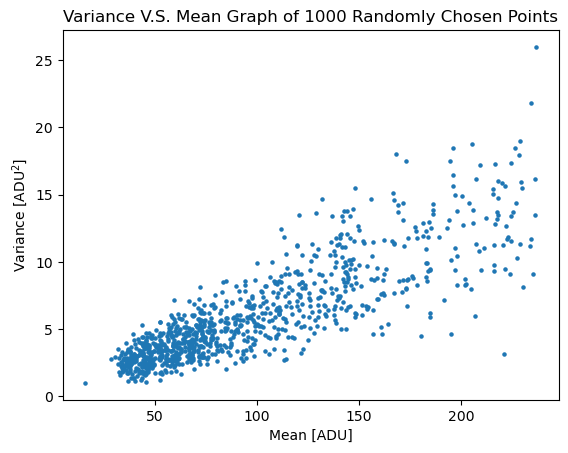

In [17]:
# Plotting
plt.title("Variance V.S. Mean Graph of 1000 Randomly Chosen Points")
plt.ylabel("Variance [ADU$^2$]")
plt.xlabel("Mean [ADU]")
plt.scatter((random_mean), (random_var), s=5)
plt.show()

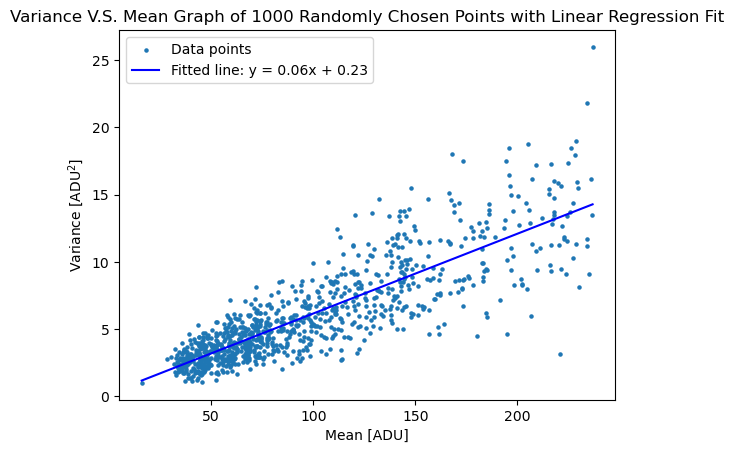

In [18]:
N = len(random_mean)

# Finding the sum of each term in the matrices
sum_mean = np.sum(random_mean)
sum_var = np.sum(random_var)

mean_times_mean = [i*i for i in random_mean]
sum_mean_squared = np.sum(mean_times_mean)

mean_times_var = [random_mean[i] * random_var[i] for i in range(len(random_mean))]
sum_mean_var = np.sum(mean_times_var)

# forming the matrix
A = np.array([[sum_mean_squared, sum_mean], [sum_mean, N]])
B = np.array([sum_mean_var, sum_var])

# solving for the two coefficients
slope, constant = np.linalg.inv(A).dot(B)

plt.scatter(random_mean, random_var, s=5, label='Data points')

# Creating points for the fitted line for smooth plotting
x_line = np.linspace(min(random_mean), max(random_mean), 100)
y_line = slope * x_line + constant
plt.plot(x_line, y_line, 'b-', label=f'Fitted line: y = {slope:.2f}x + {constant:.2f}')

plt.title("Variance V.S. Mean Graph of 1000 Randomly Chosen Points with Linear Regression Fit")
plt.ylabel("Variance [ADU$^2$]")
plt.xlabel("Mean [ADU]")

plt.legend()
plt.show()

### Section 4.2.5

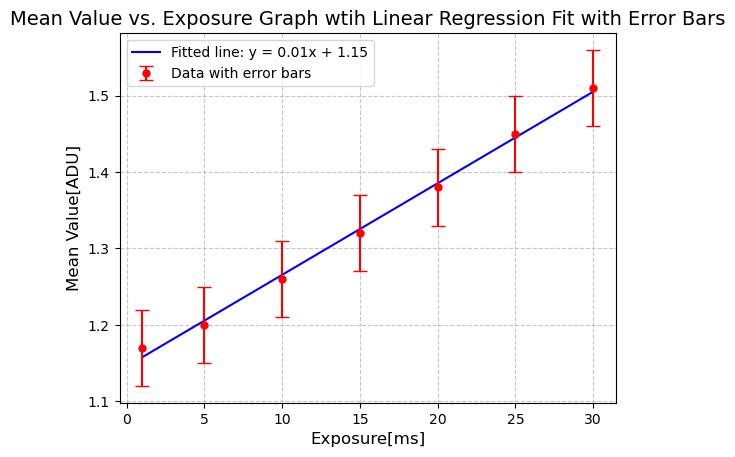

In [22]:
mean_value = [1.17, 1.2, 1.26, 1.32, 1.38, 1.45, 1.51]
exposure = [1, 5, 10, 15, 20, 25, 30]
N = len(mean_value)
plt.scatter(exposure, mean_value, s=8)
error = 0.05

sum_mean_value = np.sum(mean_value)
sum_exposure = np.sum(exposure)

exposure_value_squared = [i*i for i in exposure]
exposure_squared_sum = np.sum(exposure_value_squared)

mean_times_exposure = [mean_value[i] * exposure[i] for i in range(len(exposure))]
mean_exposure_sum = np.sum(mean_times_exposure)

# forming the matrix
A = np.array([[exposure_squared_sum, sum_exposure], [sum_exposure, N]])
B = np.array([mean_exposure_sum, sum_mean_value])

# solving for the two coefficients
slope, constant = np.linalg.inv(A).dot(B)

x_line = np.linspace(min(exposure), max(exposure), 100)
y_line = slope * x_line + constant
plt.plot(x_line, y_line, 'b-', label=f'Fitted line: y = {slope:.2f}x + {constant:.2f}')

plt.errorbar(exposure, mean_value, yerr=error, fmt='o', capsize=5, color='r', label='Data with error bars', markersize=5)
plt.xlabel('Exposure[ms]', fontsize=12)
plt.ylabel('Mean Value[ADU]', fontsize=12)
plt.title('Mean Value vs. Exposure Graph wtih Linear Regression Fit with Error Bars', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()

# Show plot
plt.show()